In [61]:
import cv2
import skimage
import matplotlib.pyplot as plt
from skimage.transform import resize

In [62]:
img1 = cv2.imread("/mnt/g/onlinelessons/deep learning/projects/FeatureExtractionWithSIFT/taj_small.jpg")

In [63]:
img1.shape

(540, 999, 3)

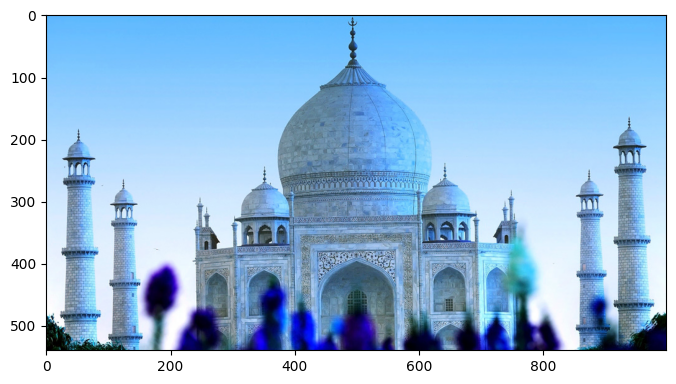

In [64]:
plt.figure(figsize=(8,6))

plt.imshow(img1)

In [65]:
gray1 = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)

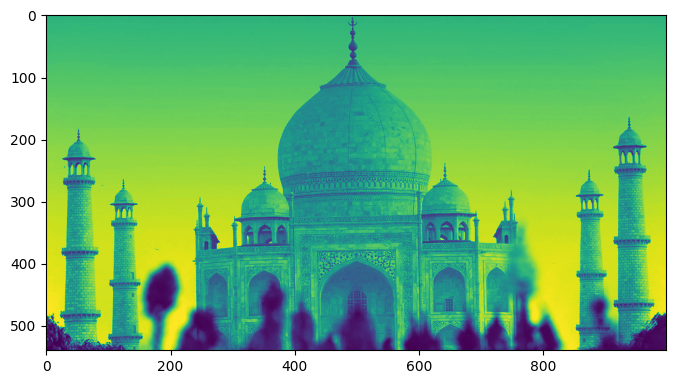

In [66]:
plt.figure(figsize=(8,6))

plt.imshow(gray1)

In [67]:
!pip install opencv-contrib-python

In [68]:
sift=cv2.SIFT_create()

In [69]:
kp1 = sift.detect(gray1, None)

In [70]:
img1 = cv2.drawKeypoints(gray1, kp1, outImage=None)

In [71]:
cv2.imwrite("sift_keypoints.jpg", img1)

True

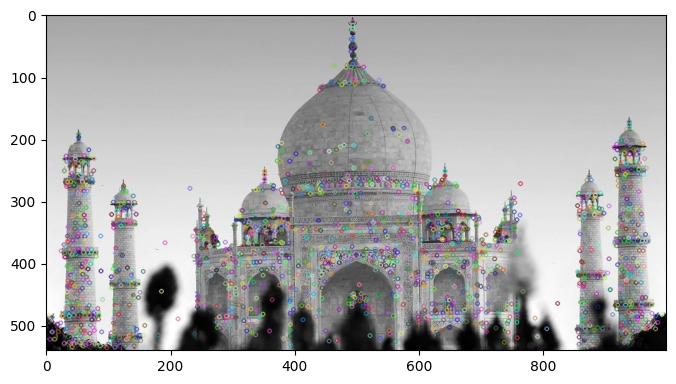

In [72]:
sift_keypoints = skimage.io.imread("sift_keypoints.jpg")

plt.figure(figsize=(8, 8))
plt.imshow(sift_keypoints, cmap='gray')

In [73]:
img2 = cv2.drawKeypoints(gray1, kp1, outImage=None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2.imwrite("rich_sift_keypoints.jpg", img2)

True

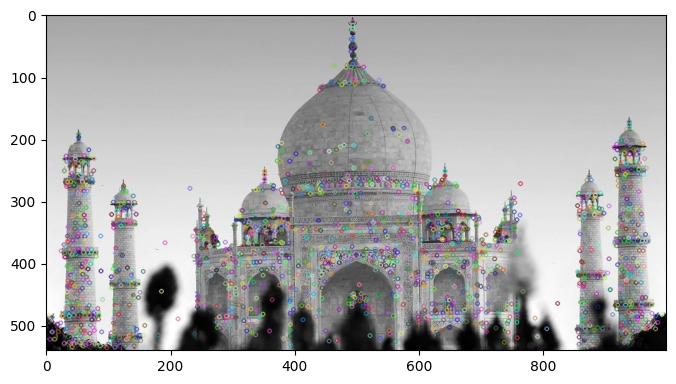

In [74]:
rich_sift_keypoints = skimage.io.imread("rich_sift_keypoints.jpg")

plt.figure(figsize=(8, 8))
plt.imshow(sift_keypoints, cmap='gray')

In [75]:
kp1, des1 = sift.compute(gray1, kp1)

In [76]:
des1.shape

(2098, 128)

In [79]:
img2 = cv2.imread("./taj_mahal_india.jpg")
img2.shape

(576, 1024, 3)

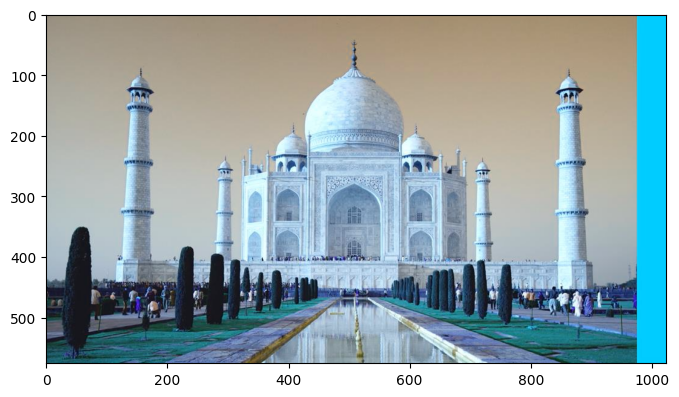

In [82]:
plt.figure(figsize=(8, 8))

plt.imshow(img2)

In [84]:
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

In [85]:
kp2, des2 = sift.detectAndCompute(gray2, None)

In [87]:
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=None)
matches = bf.match(des1, des2)

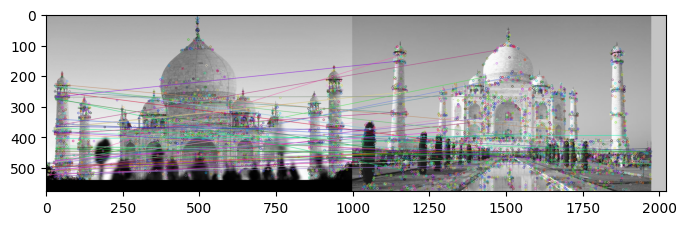

In [91]:
N_MATCHES = 50

match_img = cv2.drawMatches(gray1, kp1,
                            gray2, kp2,
                            matches[:N_MATCHES], gray2.copy(), flags=0)

plt.figure(figsize=(8, 8))
plt.imshow(match_img)                   